<a href="https://colab.research.google.com/github/KaiaLee/CNN_practice/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

分別使用簡單CNN架構和Yann LeCun 等人，1998 年提出的LeNet-5 架構進行MNIST數字辨識。

In [23]:
# 載入必要的庫
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [2]:
# 載入 MNIST 數據集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 顯示數據集的尺寸
print('Training images shape:', train_images.shape)
print('Training labels shape:', train_labels.shape)
print('Test images shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)

11490434/11490434 [==============================] - 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


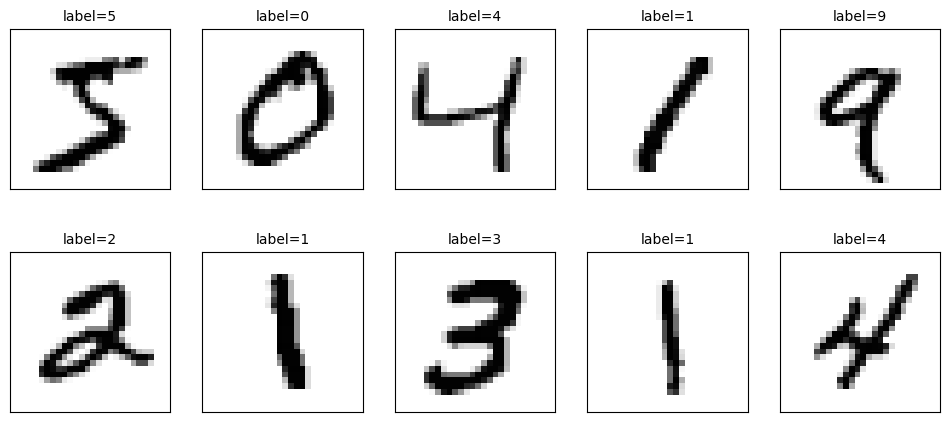

In [5]:
import matplotlib.pyplot as plt

# 建立函數要來畫多圖的
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):

  # 設定顯示圖形的大小
  fig= plt.gcf()
  fig.set_size_inches(12,14)

  # 最多25張
  if num>25:num=25

  # 一張一張畫
  for i in range(0,num):

    # 建立子圖形5*5(五行五列)
    ax=plt.subplot(5,5,i+1)

    # 畫出子圖形
    ax.imshow(images[idx],cmap='binary')

    # 標題和label
    title="label=" +str(labels[idx])

    # 如果有傳入預測結果也顯示
    if len(prediction)>0:
      title+=",predict="+str(prediction[idx])

    # 設定子圖形的標題大小
    ax.set_title(title,fontsize=10)

    # 設定不顯示刻度
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()

plot_images_labels_prediction(train_images,train_labels,[],0,10)

# 簡單CNN架構

step 1. 載入 MNIST 數據集

In [24]:
# 載入 MNIST 數據集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

 將每張 28x28 像素的圖像重塑為四維數組 (批量大小batch size, 高度, 寬度, 通道數)，讓形狀符合 CNN 模型的輸入要求。\
 astype('float32')：將數據類型轉換為 float32，這是深度學習框架（如 TensorFlow/Keras）常用的數據類型，可以提高計算效率和數值穩定性。\
 / 255：將像素值從範圍 [0, 255] 轉換為 [0, 1] 範圍。這樣做有助於加快模型收斂速度，並提高訓練的穩定性。

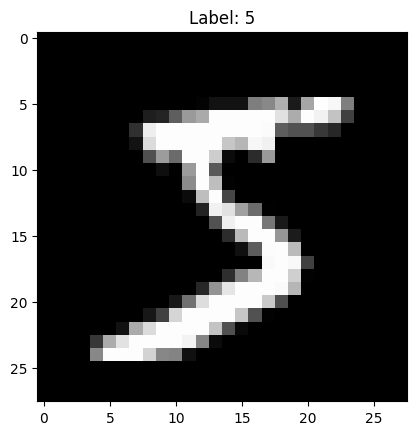

In [25]:
# 正規化數據
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# 檢查數據
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Label: {train_labels[0]}')
plt.show()

step 2. 建立簡單的 CNN 模型

In [26]:
# 建立模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

step 3. 編譯模型

In [27]:
# 編譯模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

step 4. 訓練

In [28]:
# 訓練模型
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 8s 9ms/step - loss: 0.2005 - accuracy: 0.9397 - val_loss: 0.0677 - val_accuracy: 0.9810
Epoch 2/5
844/844 [==============================] - 7s 8ms/step - loss: 0.0573 - accuracy: 0.9824 - val_loss: 0.0539 - val_accuracy: 0.9858
Epoch 3/5
844/844 [==============================] - 7s 9ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0368 - val_accuracy: 0.9883
Epoch 4/5
844/844 [==============================] - 7s 9ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0381 - val_accuracy: 0.9892
Epoch 5/5
844/844 [==============================] - 8s 9ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.0373 - val_accuracy: 0.9882


step 5. 評估

In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0335 - accuracy: 0.9894
Test accuracy: 0.9894000291824341


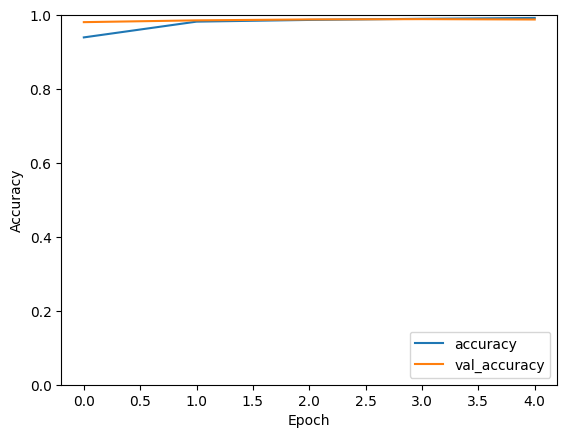

In [30]:
# 6. 繪製訓練過程中的準確率變化
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [31]:
# 檢查模型架構
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

# 簡單的 LeNet-5 架構

step 1. 載入 MNIST 數據集

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

step 2. 建立簡單的 LeNet-5 模型

In [17]:
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.AvgPool2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.AvgPool2D((2, 2)),
    layers.Conv2D(120, (3, 3), activation='relu'), # 使用 3x3 的卷積核
    layers.Flatten(),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

step 3. 編譯模型

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

step 4. 訓練

In [19]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 7s 7ms/step - loss: 0.3184 - accuracy: 0.9045 - val_loss: 0.1062 - val_accuracy: 0.9678
Epoch 2/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0896 - accuracy: 0.9725 - val_loss: 0.0642 - val_accuracy: 0.9820
Epoch 3/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0643 - accuracy: 0.9801 - val_loss: 0.0490 - val_accuracy: 0.9843
Epoch 4/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0493 - val_accuracy: 0.9867
Epoch 5/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.0525 - val_accuracy: 0.9832


step 5. 評估

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0490 - accuracy: 0.9840
Test accuracy: 0.984000027179718


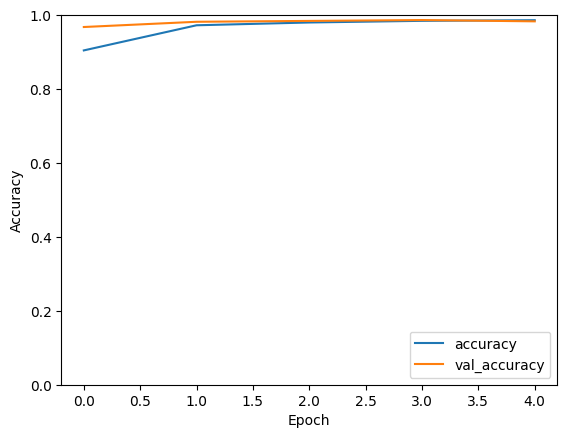

In [21]:
# 6. 繪製訓練過程中的準確率變化
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [22]:
# 檢查模型架構
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_14 (Conv2D)          (None, 2, 2, 120)         17400     
                                                                 
 flatten_4 (Flatten)         (None, 480)              